<a href="https://colab.research.google.com/github/daka13/HowLLMsWork/blob/main/INFO_4940_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from ipywidgets import interactive, Layout, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
import regex
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

# INFO 4940 LLMs: optimization and model training

This homework is about using gradients to optimize functions. For models with millions or billions of parameters, like LLMs, the only known way to find good settings of the parameters is iterative, approximate optimization algorithms. You will practice optimizing using gradients to see what works well, where things can go wrong, and what we can do to make it work better.

**Multivariable calculus** As a reminder, if a function has $K$ parameters, it has a *gradient* which is a vector of length $K$. Each element of that vector is the derivative of the $k$th parameter. For every setting of the $K$ parameters we can use the function to calculate a single value, and we can use the derivative functions to calculate the $K$ values that make up the gradient.

Optimization is the process of finding values for the $K$ parameters that minimize or maximize the value of the function. The sign of the derivative for each parameter tells us if increasing or decreasing the value of that parameter will improve the output value of the function.

As with the previous problem set, discuss and ask questions on Ed, but write your own solutions, and don't give anyone answers or other help that isn't actually helpful. Convert the notebook to PDF to turn it in. Many students are using VSCode, you can save a notebook in VSCode, open it in Jupyter and "print to PDF" from there.

## Problem 1: Use a gradient to optimize a tiny logistic regression (25 points)

Using code similar to what we saw in class, find the value of `slope` and `intercept` that makes `loss` closest to zero.

There are two parameters (slope and intercept), so the gradient is a vector with two values, one for each parameter. The current value of these two derivatives is shown as `d/slope` and `d/intercept`. Use these numbers as hints to change the values of the sliders in order to improve the loss function.

When you decide you have found the best values, record the slope, intercept, gradient values, and loss in a text field. Also comment on your experience: Was this process hard or easy? Could you optimize one slider and then the other, or did you have to go back and forth? Were you able to reach loss zero? Why or why not? How far were you moving the sliders at the beginning of the process, and how far at the end?

(Grading note: there is an optimal answer, and we'd like you to be close to it, but we're more interested in the *process* of finding the answer. Most points will come from your discussion.)

In [ ]:
def logit(x):
  return np.exp(x) / (1 + np.exp(x))

# input and label pairs for three observations
x = np.array([-1, 0.5, 1])
y = np.array([1, 0, 1])

def show_logistic(slope, intercept):
    plt.figure(figsize=(12,3))
    x_domain = np.linspace(-3, 3, num=30)
    plt.plot(x_domain, logit(slope * x_domain + intercept))

    plt.plot(x, y, "ro")
    p = logit(slope*x + intercept)

    for i in range(len(x)):
        plt.plot([x[i], x[i]], [p[i], y[i]])
    plt.ylim(-0.1, 1.1)

    labels_minus_predictions = y - p
    intercept_derivative = np.sum(labels_minus_predictions)
    slope_derivative = labels_minus_predictions @ x

    loss = np.sum(y * np.log(p) + (1-y) * np.log(1-p))
    print(f"loss: {loss:.5f} d/slope: {slope_derivative:.5f} d/intercept: {intercept_derivative:.5f}")

    plt.show()

interactive_plot = interactive(show_logistic,
                               slope=FloatSlider(min=-6.0, max=6.0, step=0.05, layout=Layout(width='700px')),
                               intercept=FloatSlider(min=-5.0, max=5.0, step=0.05, layout=Layout(width='700px')),
                              )
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', layout=Layout(width='700px'), max=6.0, min=-…

**Answer here**

As I increased the d/slope it reduced the loss and it kept getting closer to zero however, it's the same with reducing the d/intercept reduces the loss as well getting closer to zero

## Problem 2: The effect of learning rates (25 points)

As you saw in the previous problem, the gradient gives you a direction to move the parameters, but doesn't necessarily tell you how far to move in that direction. In this problem we will apply the gradient updates automatically, your job is to see how the *learning rate* affects convergence to the maximum.

For this example we'll use a very simple 1-parameter model, an upside-down parabola. Recall that if $f(x) = ax^2 + bx + c$, $f'(x) = 2ax + b$. Your job is to find the best $x$ value to maximize $y$. As you'll see, this is not actually a hard problem, but it is a good way to show two potential problems with gradient descent algorithms:

* (timidness) if the rate is too small, the value will increase more slowly than necessary
* (overconfidence) if the rate is too large, the value will oscillate wildly

Run this code several times with different learning rates. In the text box below, describe what happens when you use $0.6, 0.2, 0.05, 1.2, 2.0, 0.5, 1.0$. The last two are special, briefly explain why. Describe what happens to the gradient when the $x$ value is near the optimal value.

parameter [-1.5  0.   0.   0.   0. ]
value [-0.25  2.    2.    2.    2.  ]
gradient [ 3. -0. -0. -0. -0.]


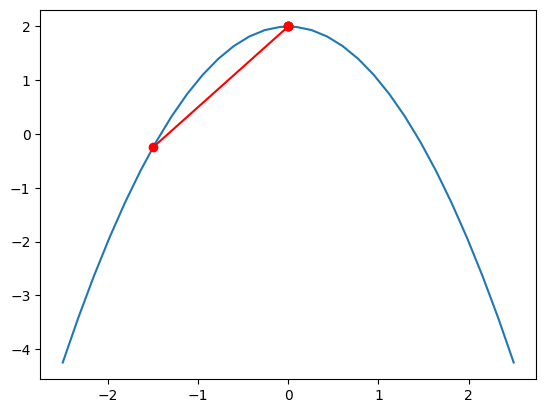

In [ ]:
# how far we should go in the direction
learning_rate = 0.5 # <- CHANGE THIS VALUE
iterations = 5

# define a function with one parameter and its derivative
def parabola(x):
    return -x*x + 2

def d_parabola(x):
    return -2*x

# allocate memory for the parameter value, the value of the function, and the gradient
#  for each iteration
parameter = np.zeros(iterations)
value = np.zeros(iterations)
gradient = np.zeros(iterations)

# set values for the initial state
parameter[0] = -1.5
value[0] = parabola(parameter[0])
gradient[0] = d_parabola(parameter[0])

# for the remaining iterations, update the parameter value
#  and recalculate the gradient
for i in range(1, iterations):
    parameter[i] = parameter[i-1] + learning_rate * gradient[i-1]
    value[i] = parabola(parameter[i])
    gradient[i] = d_parabola(parameter[i])

# plot the trajectory for the trajectory as we optimize
x_domain = np.linspace(np.min([-2.5, np.min(parameter)]),
                       np.max([2.5, np.max(parameter)]), num=30)
plt.plot(x_domain, parabola(x_domain))
plt.plot(parameter, value, "-ro")

print("parameter", parameter)
print("value", value)
print("gradient", gradient)
plt.show()

**Answer here**

Learning Rate = 0.6:
Here, the parameter converges steadily towards the maximum and overshoots by a bit.

Learning Rate = 0.2:
Here, the learning rate is smaller hence why it takes to smaller steps towards the maximum. Convergence is slower but it won't overshoot.

Learning Rate = 0.05:
Here, the learning rate is too small. It's leads to a very slow convergence towards the maximum. This is definitely inefficient.

Learning Rate = 1.2:
Here, the learning rate is large. The parameters seems jump back and forth across the maximum without settling down causing it to overshoot with each update. Thus, no convergence

Learning Rate = 2.0:
Here, the learning rate is much larger. The parameter seems to move slowly towards the maximum and then overshoots across the maximum and then back to base.

Learning Rate = 0.5:
This is a good learning rate because it causes the parameter to converge at the maximum in a single step.

Learning Rate = 1.0:
Here, the learning rate causes the parameter to oscillate between two values without converging.

## Problem 3: gradient descent on real data (25 points)

This problem is very similar to the previous one, but rather than a simple function with one parameter we will optimize a logistic regression likelihood function classifying 1000 documents with twelve thousand parameters, one for each vocabulary word.

The next few cells load data, find the ids for some words of interest, and define some helper functions.

The cell that starts with `learning_rate` implements the gradient update for logistic regression that we have been working with. For each iteration it prints some diagnostic information:
* The current value of the loss function (ideally close to zero)
* The number of correctly predicted training documents (ideally 1000)
* The sum of the absolute values of the parameters $\beta$
* The sum of the absolute values of the gradient
* Values for the $\beta$ parameters for two words

Try different values of the learning rate. Find *at least* one that is too large, one that is too small, and one that you like. If your value is too large you may see `nan` or infinite values. In the text cell below, provide justification for your answers. For example, describe the values you tried and how the diagnostic values are affected. Does the loss improve each time, or does it oscillate? Do the parameter values converge to a single value or do they change from iteration to iteration? Add any other observations, and feel free to add additional code.

(Grading note: again, we're expecting there to be a range of "good" values, you don't need to give us a precise number. We will be more interested in how you justify your decisions.)

In [ ]:
# load documents from tab-delimited file, tokenize and count
with open("ac_stats.tsv") as reader:
  source_docs = pd.read_csv(reader, sep="\t")
vectorizer = CountVectorizer()

# convert to sparse matrix
doc_words = vectorizer.fit_transform(source_docs["Text"].astype('U').values)
num_docs, vocab_size = doc_words.shape

# create an array containing the vocabulary for display
vocab = np.empty(vocab_size, dtype=object)
for word, word_id in vectorizer.vocabulary_.items():
    vocab[word_id] = word

# convert to numeric labels
labels = 1 * (source_docs["Source"] == "academia")

doc_words.sum(), labels.sum(), num_docs, vocab_size

(188226, 500, 1000, 12592)

In [ ]:
# find the index of two words likely to matter
np.where(vocab == "data"), np.where(vocab == "thesis")

((array([4078]),), (array([11411]),))

In [ ]:
# This function avoids log(0) errors
def cross_entropy(labels, predictions):
    non_zero_indices = np.where(predictions > 0.0)[0]
    non_one_indices = np.where(predictions < 1.0)[0]

    loss = labels[non_zero_indices] * np.log(predictions[non_zero_indices])
    loss += (1 - labels[non_one_indices]) * np.log(1 - predictions[non_one_indices])
    return loss.sum()

# Sort the vocabulary according to the vector provided, print the words at both extremes
def sort_words(v, n=10):
    words = sorted(zip(v, vocab))
    output = [" ".join(["{}".format(word) for score, word in words[:n]]), "...",
            " ".join(["{}".format(word) for score, word in words[-n:]])]
    return " ".join(output)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / (1 + exp_x)

In [ ]:

learning_rate = 0.000028   # <- CHANGE THIS VALUE
iterations = 15

# initialize weights randomly
weights = np.random.normal(0, 0.01, vocab_size)
scores = doc_words @ weights
predictions = softmax(scores)

print("    loss  correct    |beta|    |grad|   'data' 'thesis'\n-------------------------------------------------------")

for iteration in range(iterations):
    gradient = doc_words.T @ (labels - predictions)
    weights += learning_rate * gradient

    scores = doc_words @ weights
    predictions = softmax(scores)

    correct = np.sum(labels == 1 * (predictions > 0.5))
    loss = cross_entropy(labels, predictions)
    print("{: 8.2f} {: 8d} {: 9.2f} {: 9.2f} {: 8.3f} {: 8.3f}".format(np.sum(loss), correct,
                                                     np.sum(np.abs(weights)), np.sum(np.abs(gradient)),
                                                     weights[4078], weights[11411]
                                                    ))
    sort_words(gradient)

    loss  correct    |beta|    |grad|   'data' 'thesis'
-------------------------------------------------------
 -660.39      564    101.31  41097.60   -0.008   -0.000
 -644.24      573    101.51  45732.30   -0.012    0.002
 -622.17      618    101.61  46196.82   -0.024    0.003
 -578.16      655    101.87  47371.86   -0.026    0.005
 -529.68      739    101.97  40715.12   -0.036    0.006
 -493.09      811    102.18  32923.93   -0.039    0.007
 -472.13      812    102.31  24763.30   -0.045    0.008
 -459.39      838    102.47  20763.66   -0.049    0.009
 -449.64      829    102.61  18575.73   -0.053    0.010
 -441.07      838    102.76  17817.74   -0.057    0.012
 -433.23      844    102.90  17214.07   -0.061    0.013
 -425.97      846    103.04  16693.36   -0.065    0.013
 -419.22      850    103.18  16221.61   -0.069    0.014
 -412.91      853    103.32  15790.53   -0.072    0.015
 -406.98      854    103.46  15394.88   -0.076    0.016


**Answer here**

Trying with a learning rate that is too small:

Example: 0.00001

Here, the loss decreases very slowly over iterations, and the number of correct predictions increases at a similarly pace. This indicates that the learning rate is too conservative, leading to very small updates to the model parameters and thus requiring potentially many more iterations to converge to an optimal solution. The sum of the absolute values of weights and gradients changes very little, meaning the model parameters are barely updating. For this it's a slow convergence as it requires many iterations to reach an optimal solution.

Trying with a learning rate that is too large:

Example: 0.00008

Here, the loss increased rapidly causing the model to diverge. However, in subsequent iterations, the loss begins to decrease, and the number of correct predictions increases more rapidly than with the lower learning rate. As a result this tells us that the learning rate is too aggressive, causing the model to overshoot the optimal parameters before starting to converge. The sum of the absolute values of the weights and gradients also shows larger changes, indicating more substantial updates to the model parameters.


For a learning rate that is just right:

Example: 0.000028

Since, the aim is to find a balance where the loss steadily decreases and the number of correct predictions increases consistently across iterations. I used a learning rate of 0.000028 which allowed the model to consistently reduce loss and increase the number of correct predictions while keeping the parameter updates in check. The parameter values show convergence towards a stable set of values without the large fluctuations seen with higher learning rates.

## Problem 4: parameter-specific learning rates (25 points)

As you saw, just multiplying the gradient by a small constant is effective but you need to get the learning rate exactly right. Technically, [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) for finding the optimal parameters of a function involves iteratively updating the current parameters by adding the gradient *divided by the matrix of second derivatives*. This matrix, called the *Hessian*, is usually much too large to calculate for large models, much less to invert.

An alternative is to use a method that defines a separate learning rate for each parameter. This approximates the diagonal of the Hessian matrix. These methods include Adam, AdamW, AdaDelta, RMSprop, and others that you might have seen in finetuning code. We'll use the simplest, AdaGrad (adaptive gradients).

The intuition for most of these methods is "if you've moved a parameter a lot in the past, leave it alone". For every iteration, Adagrad adds up the sum of the previous gradients squared. We then divide the current gradient by the square root of this sum. If a parameter has had a large derivative in previous iterations, we'll divide its current derivative by a larger value.

The diagnostic output adds an additional column, showing the sum of the absolute values of the actual update (the gradient divided by the parameter-specific learning rates).

Find a good learning rate. Describe what you observe in the diagostic values, similar to the previous problem. Compare these to the values in the previous problem (ie without Adagrad).

(Grading note: same as before, don't worry overly about precise numbers, focus on *why* you chose a number.)

In [ ]:
# version with adagrad

learning_rate = 0.0004  # <- CHANGE THIS VALUE
iterations = 15

weights = np.random.normal(0, 0.01, vocab_size)
scores = doc_words @ weights
predictions = softmax(scores)
correct = np.sum(labels == 1 * (predictions > 0.5))

squared_gradient_sum = np.zeros(vocab_size)

print("    loss  correct    |beta|    |grad|  |update|   'data' 'thesis'\n-----------------------------------------------------------------")

for iteration in range(iterations):
    gradient = doc_words.T @ (labels - predictions)
    squared_gradient_sum += gradient * gradient

    update = gradient / np.sqrt(squared_gradient_sum)

    weights += learning_rate * update

    scores = doc_words @ weights
    predictions = softmax(scores)

    correct = np.sum(labels == 1 * (predictions > 0.5))
    loss = cross_entropy(labels, predictions)
    print("{: 8.2f} {: 8d} {: 9.2f} {: 9.2f} {: 9.2f} {: 8.2f} {: 8.2f}".format(np.sum(loss), correct,
                                                np.sum(np.abs(weights)),
                                                np.sum(np.abs(gradient)),
                                                np.sum(np.abs(update)),
                                                              weights[4078], weights[11411]
                                               ))

print()
print("most extreme gradient:", sort_words(gradient))
print("most extreme updates:", sort_words(update))

    loss  correct    |beta|    |grad|  |update|   'data' 'thesis'
-----------------------------------------------------------------
 -701.65      488     98.99  43123.24  12592.00    -0.01    -0.00
 -690.25      534     99.12  41582.09   8731.36    -0.01    -0.00
 -681.25      570     99.28  40523.86   7045.42    -0.01    -0.00
 -673.68      594     99.47  39678.95   6043.95    -0.01    -0.00
 -667.07      616     99.66  38962.20   5362.52    -0.01    -0.00
 -661.16      632     99.86  38334.64   4862.03    -0.01    -0.00
 -655.79      651    100.07  37773.98   4475.04    -0.01     0.00
 -650.86      668    100.27  37264.98   4164.03    -0.01     0.00
 -646.29      679    100.48  36798.51   3906.93    -0.01     0.00
 -642.03      693    100.69  36366.89   3689.70    -0.01     0.00
 -638.02      704    100.90  35964.61   3503.10    -0.01     0.00
 -634.23      712    101.12  35587.33   3340.56    -0.01     0.00
 -630.64      728    101.33  35231.74   3197.08    -0.01     0.00
 -627.22  

**Answer here**

I experiment with several learning rates before settling with 0.0004 because
- The loss decreases at a faster rate compared to the smaller learning rate.
- The number of correct predictions increases more substantially, from 488 to 752, over the 15 iterations.
- The |update| values were also decreasing but not as rapidly as with the smaller learning rate.
- The changes in the weights for 'data' and 'thesis' are still quite small.

## Advanced challenge (no points, only bragging rights)

Copy the previous code cell. Implement Adam. Discuss.